In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Ames_Housing_Final.csv")

In [3]:
df.columns.tolist()

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Land Slope',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Street_Pave',
 'Lot Shape_IR2',
 'Lot Shape_

In [4]:
df.isnull().sum().sum()

0

# Separating the target and features variable

In [5]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

#Sets target variable (Sale Price) as y
#Sets feature variables (everything but Sale Price and Id) as X

# Train| Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [7]:
X_train.shape, X_test.shape

((2032, 207), (872, 207))

# Scaler Data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Grid Search CV

1. Lasso

In [9]:
from sklearn.linear_model import Lasso
Lasso_model =Lasso()
param_grid = {'alpha':[0.1,1,5,50,80,90,100,150,200,250]}

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
grid_model = GridSearchCV(estimator = Lasso_model,
                          param_grid=param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv=5,
                          verbose = 2)

In [12]:
estimator=Lasso_model
estimator.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [13]:
grid_model.fit(X_train,y_train)
#fitting 5 folds for each 8 candidates
# 5 folds is from cv
# 8 candidates is from alpha

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299304720589.1471, tolerance: 947448341.6879702
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ........................................ alpha=0.1, total=   0.8s
[CV] alpha=0.1 .......................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275282789896.3942, tolerance: 997770735.507836
  positive)


[CV] ........................................ alpha=0.1, total=   0.8s
[CV] alpha=0.1 .......................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308645060549.51984, tolerance: 965130700.0800997
  positive)


[CV] ........................................ alpha=0.1, total=   0.6s
[CV] alpha=0.1 .......................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313708940398.79333, tolerance: 975875346.7070464
  positive)


[CV] ........................................ alpha=0.1, total=   0.5s
[CV] alpha=0.1 .......................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290892543733.6776, tolerance: 978413072.905143
  positive)


[CV] ........................................ alpha=0.1, total=   0.5s
[CV] alpha=1 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232568666198.5578, tolerance: 947448341.6879702
  positive)


[CV] .......................................... alpha=1, total=   0.6s
[CV] alpha=1 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10220943835.466797, tolerance: 997770735.507836
  positive)


[CV] .......................................... alpha=1, total=   0.7s
[CV] alpha=1 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259033298427.78503, tolerance: 965130700.0800997
  positive)


[CV] .......................................... alpha=1, total=   0.6s
[CV] alpha=1 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150688799068.65237, tolerance: 975875346.7070464
  positive)


[CV] .......................................... alpha=1, total=   0.6s
[CV] alpha=1 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179082944950.63272, tolerance: 978413072.905143
  positive)


[CV] .......................................... alpha=1, total=   0.5s
[CV] alpha=5 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26018483765.492004, tolerance: 947448341.6879702
  positive)


[CV] .......................................... alpha=5, total=   0.5s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.6s
[CV] alpha=5 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84233947851.07007, tolerance: 965130700.0800997
  positive)


[CV] .......................................... alpha=5, total=   0.5s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.5s
[CV] alpha=5 .........................................................


C:\Users\user\anaconda3\envs\NSSDC1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14430070978.862488, tolerance: 978413072.905143
  positive)


[CV] .......................................... alpha=5, total=   0.6s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.5s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.4s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.5s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.6s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.5s
[CV] alpha=80 ........................................................
[CV] ......................................... alpha=80, total=   0.5s
[CV] alpha=80 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 5, 50, 80, 90, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
grid_model.best_estimator_

Lasso(alpha=250)

In [15]:
grid_model.best_params_

{'alpha': 250}

In [16]:
grid_model.best_score_

-527250421.4856758

In [17]:
grid_model.best_estimator_.coef_

array([-4.41679320e+03,  1.41176680e+03,  4.51506794e+03,  2.34078820e+02,
        1.14796855e+04,  4.87663235e+03,  6.85397477e+03,  1.28867955e+03,
        7.44329421e+03,  3.81258430e+03,  0.00000000e+00,  2.73292435e+03,
       -2.07452048e+03,  4.52299997e+03, -0.00000000e+00,  9.57438840e+03,
        0.00000000e+00,  2.09832537e+03, -0.00000000e+00,  4.65681048e+03,
        1.24854846e+03,  1.17618590e+03,  0.00000000e+00, -8.53525354e+02,
        2.66746072e+04,  4.44185347e+02, -5.19654602e+02,  4.22222301e+02,
        3.08439330e+02, -2.83731326e+03, -1.80217244e+03,  3.88737557e+03,
        9.70358097e+02,  3.53647123e+03,  1.26742723e+03,  0.00000000e+00,
       -0.00000000e+00,  2.30187641e+03,  3.54029367e+03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.60534688e+03,  9.99336862e+02,
        1.22271959e+02, -0.00000000e+00,  1.56376084e+03,  2.56721759e+02,
        0.00000000e+00, -0.00000000e+00, -2.57485039e+02, -6.27297582e+02,
        0.00000000e+00,  

In [18]:
np.sum(grid_model.best_estimator_.coef_ == 0)

65

In [20]:
from sklearn.metrics import mean_squared_error
y_pred = grid_model.predict(X_test)
mean_squared_error(y_test,y_pred)

440527297.15273356

# RMSE

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [22]:
RMSE

20988.74215270495

In [23]:
df['SalePrice'].mean()

179875.34917355372

In [24]:
RMSE/df['SalePrice'].mean()*100

11.668492791891035

# SAVE MODEL

In [25]:
from joblib import dump, load

In [26]:
dump(grid_model, 'Ames_model.joblib')

['Ames_model.joblib']

In [27]:
dump (scaler, 'Ames_scaler.pkl')

['Ames_scaler.pkl']

# Model Evaluation

In [28]:
test_predictions=grid_model.predict(X_test)
test_res=y_test-test_predictions

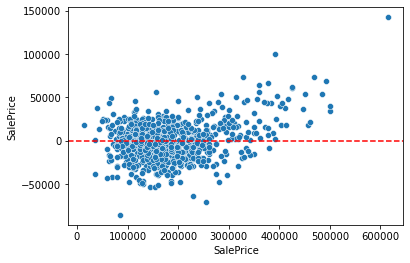

In [29]:
sns.scatterplot(x =y_test,y=test_res)
plt.axhline(y=0,color='r',linestyle ='--') 

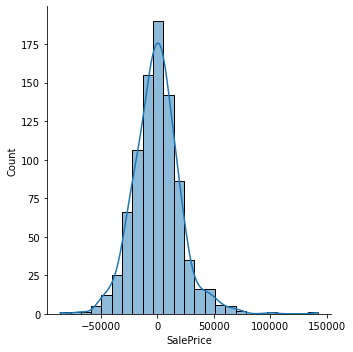

In [30]:
sns.displot(test_res,bins=25,kde=True)

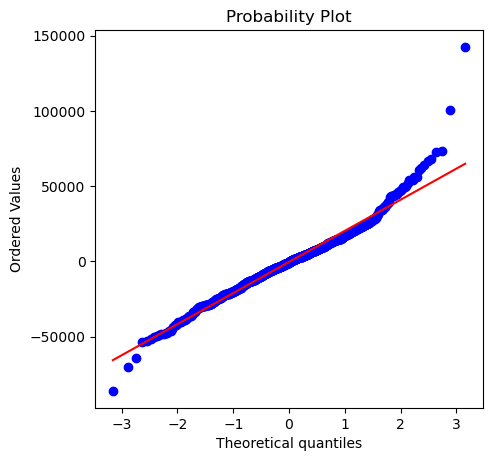

In [31]:
import scipy as sp

#create a figure and axis to plot on
fig,ax=plt.subplots(figsize=(5,5),dpi=100)

#probplot returns the raw values if needed
#we just want to see the plot,so we assign these value to _
_ =sp.stats.probplot(test_res,plot=ax)